In [64]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [65]:
tf.config.list_physical_devices('GPU') 

[]

In [66]:
batch_size = 100
img_height = 250
img_width = 250

In [67]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/train/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/test/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    './data/val/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 1463 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 420 files belonging to 2 classes.


In [68]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [69]:
# from keras.preprocessing.image import ImageDataGenerator
# from skimage import io
# datagen = ImageDataGenerator(        
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = True,
#         brightness_range = (0.5, 1.5))
# import numpy as np
# import os
# from PIL import Image
# image_directory = r'./data/train/Accident/'
# SIZE = 250
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):    
#     if (image_name.split('.')[1] == 'jpg'):        
#         image = io.imread(image_directory + image_name)        
#         image = Image.fromarray(image, 'RGB')        
#         image = image.resize((SIZE,SIZE)) 
#         dataset.append(np.array(image))
# x = np.array(dataset)
# i = 0
# for batch in datagen.flow(x, batch_size=16,
#                           save_to_dir= r'./data/train/Accident/',
#                           save_prefix='dr',
#                           save_format='jpg'):    
#     i += 1    
#     if i > 20:        
#         break

In [70]:
img_shape = (img_height, img_width, 3)

In [90]:
img_shape = (img_height, img_width, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False,weights='imagenet')
base_model.trainable = False

In [91]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [92]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=5,verbose=1)

model_cp=ModelCheckpoint(filepath="model-new.h5", monitor="val_accuracy", save_best_only=True,verbose=1)

In [98]:
history = model.fit(training_ds, validation_data = validation_ds,callbacks=[es,model_cp], epochs = 50)

Epoch 1/50
46/46 [==============================] - ETA: 0s - loss: 0.1173 - accuracy: 0.9631
Epoch 1: val_accuracy improved from -inf to 0.70952, saving model to model-new.h5
46/46 [==============================] - 56s 1s/step - loss: 0.1173 - accuracy: 0.9631 - val_loss: 0.8124 - val_accuracy: 0.7095
Epoch 2/50
46/46 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9645
Epoch 2: val_accuracy improved from 0.70952 to 0.71667, saving model to model-new.h5
46/46 [==============================] - 50s 1s/step - loss: 0.0823 - accuracy: 0.9645 - val_loss: 0.9072 - val_accuracy: 0.7167
Epoch 3/50
46/46 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.9795
Epoch 3: val_accuracy improved from 0.71667 to 0.72381, saving model to model-new.h5
46/46 [==============================] - 48s 1s/step - loss: 0.0705 - accuracy: 0.9795 - val_loss: 0.8520 - val_accuracy: 0.7238
Epoch 4/50
46/46 [==============================] - ETA: 0s - loss: 0.0398 - ac

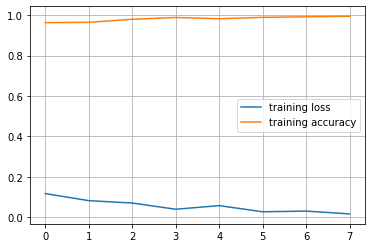

In [99]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [100]:
f=tf.config.experimental.list_physical_devices('GPU')
f

[]

In [78]:
model.fit(training_ds.repeat(),
           validation_data = validation_ds.repeat(),
             verbose=1,
             steps_per_epoch=16,
             validation_steps=8,
             callbacks=[es,model_cp],
             epochs = 10)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.5985 - Accuracy: 0.6699
Epoch 1: val_Accuracy did not improve from 0.48438
16/16 [==============================] - 24s 1s/step - loss: 0.5985 - Accuracy: 0.6699 - val_loss: 0.6551 - val_Accuracy: 0.6680
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.6505 - Accuracy: 0.5918
Epoch 2: val_Accuracy did not improve from 0.48438
16/16 [==============================] - 21s 1s/step - loss: 0.6505 - Accuracy: 0.5918 - val_loss: 0.7164 - val_Accuracy: 0.5156
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.6264 - Accuracy: 0.6103
Epoch 3: val_Accuracy did not improve from 0.48438
16/16 [==============================] - 21s 1s/step - loss: 0.6264 - Accuracy: 0.6103 - val_loss: 0.6140 - val_Accuracy: 0.6211
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.5206 - Accuracy: 0.7070
Epoch 4: val_Accuracy did not improve from 0.48438
16/16 [==========================

In [31]:
model.save('model-aug1.h5')

In [101]:
from keras.models import load_model

In [102]:
model = load_model('model-new.h5')

1/1 [==============================] - 2s 2s/step


InvalidArgumentError: slice index 32 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

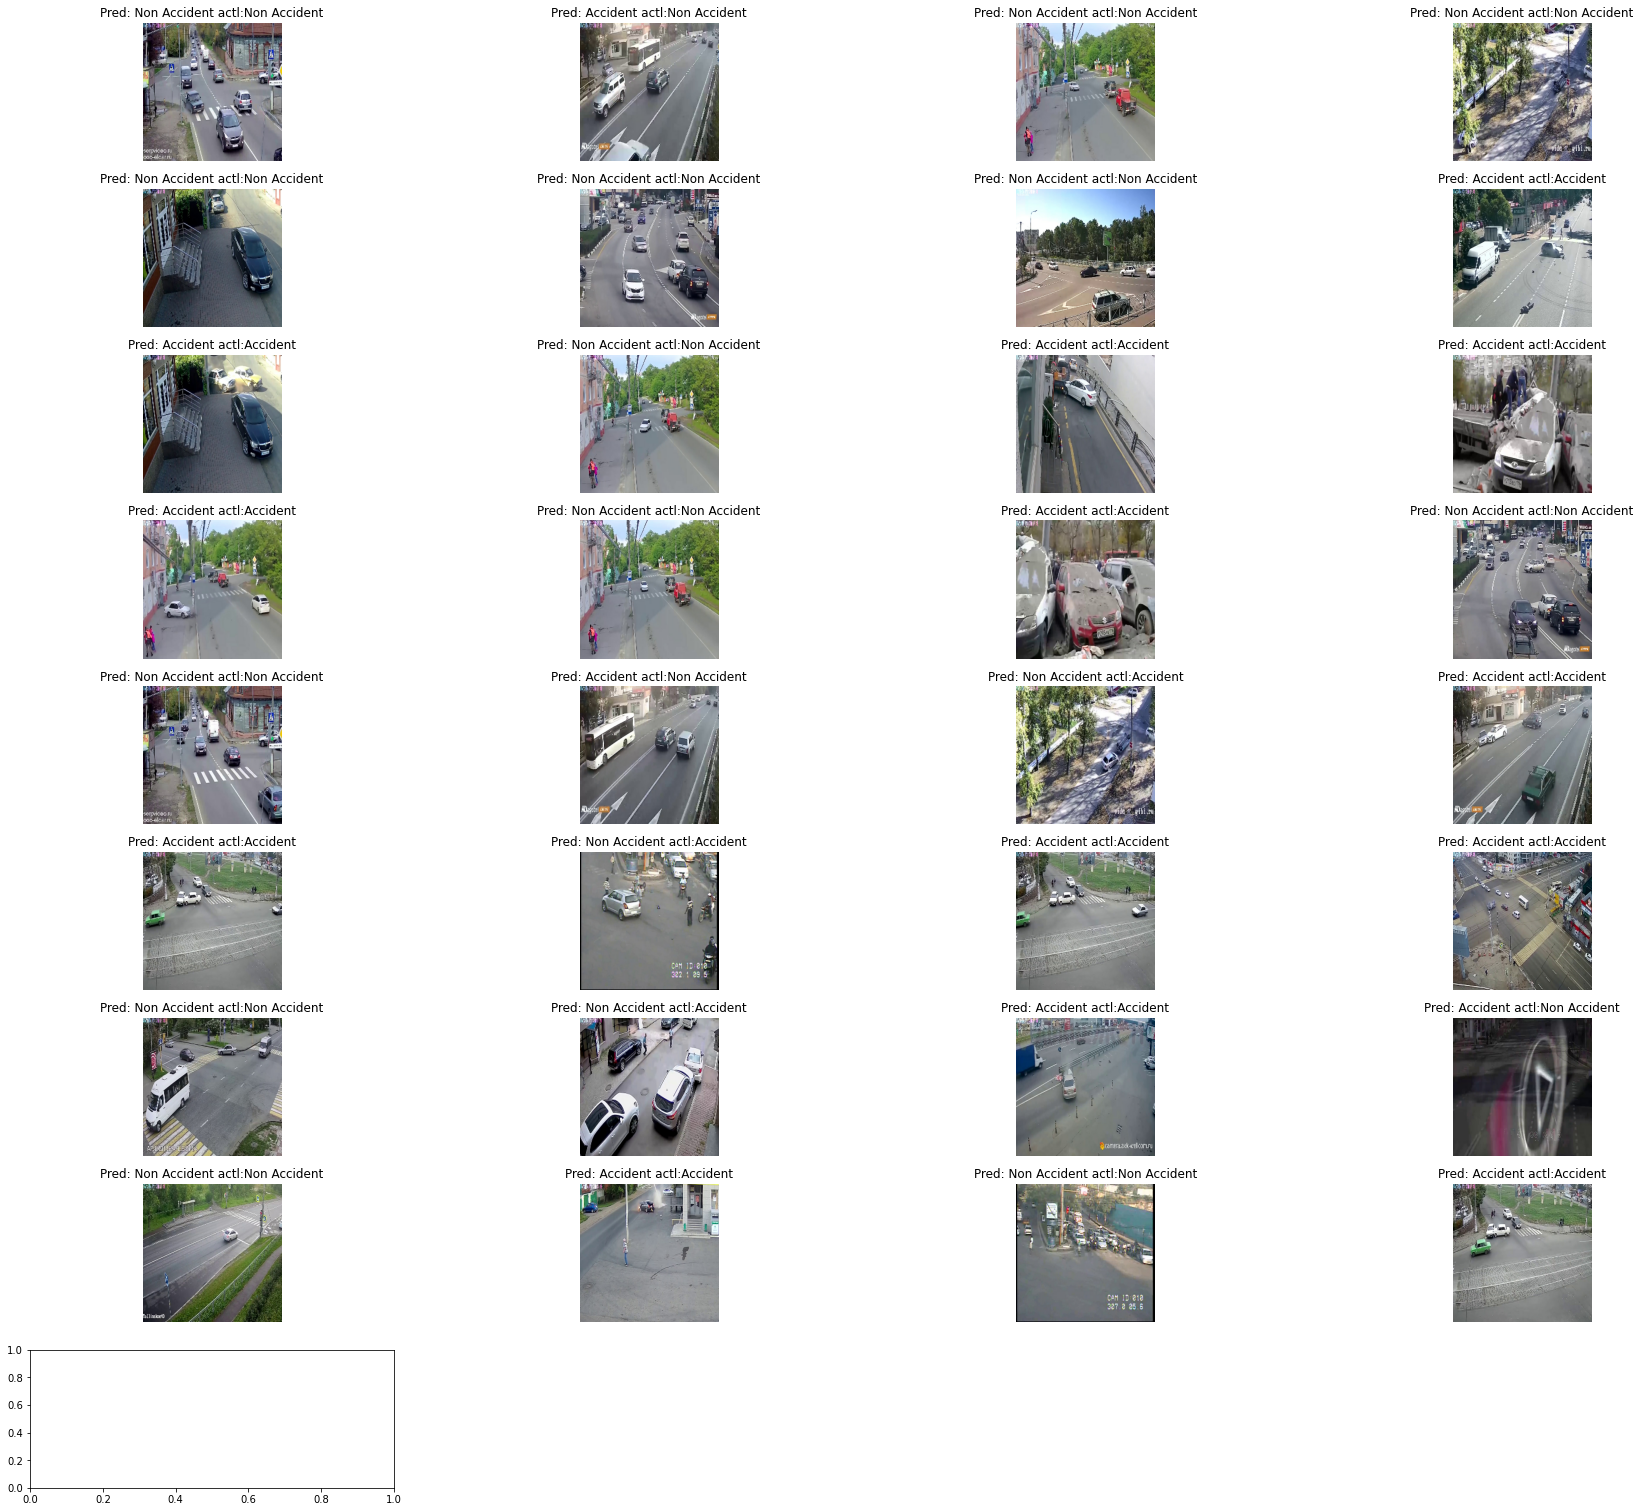

In [103]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

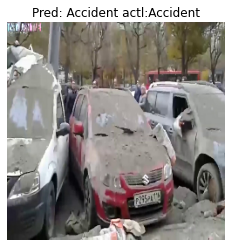

In [132]:
for i in range(15):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [133]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [134]:
import cv2
image=[]
label=[]
c=1
cap= cv2.VideoCapture('./yes.mp4')
while True:
    ret, frame = cap.read()
    if (ret != True):
        break
    if c%15==0:
        print(c/30)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
    c+=1

cap.release()

0.5
1/1 [==============================] - 0s 162ms/step
1.0
1/1 [==============================] - 0s 102ms/step
1.5
1/1 [==============================] - 0s 162ms/step
2.0
1/1 [==============================] - 0s 107ms/step
2.5
1/1 [==============================] - 0s 76ms/step
3.0
1/1 [==============================] - 0s 48ms/step
3.5
1/1 [==============================] - 0s 62ms/step
4.0
1/1 [==============================] - 0s 62ms/step
4.5
1/1 [==============================] - 0s 53ms/step
5.0
1/1 [==============================] - 0s 46ms/step
5.5
1/1 [==============================] - 0s 42ms/step
6.0
1/1 [==============================] - 0s 45ms/step
6.5
1/1 [==============================] - 0s 52ms/step
7.0
1/1 [==============================] - 0s 80ms/step
7.5
1/1 [==============================] - 0s 85ms/step
8.0
1/1 [==============================] - 0s 72ms/step
8.5
1/1 [==============================] - 0s 81ms/step
9.0
1/1 [==============================] - 0

In [135]:
# import cv2
# image=[]
# label=[]

# c=1
# cap= cv2.VideoCapture('Accident-1.mp4')
# while True:
#     grabbed, frame = cap.read()
#     if c%30==0:
#         print(c)
#         resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
#         image.append(frame)
#         label.append(predict_frame(resized_frame))
#         if(len(image)==75):
#             break
#     c+=1

# cap.release()

In [129]:
label

['Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'Accident Detected',
 'No Accident',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected']

Accident Detected
AxesImage(54,36;334.8x217.44)


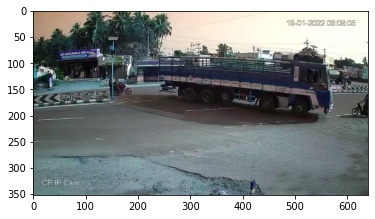

In [131]:
print(label[0])
print(plt.imshow(image[0]))

AxesImage(54,36;334.8x217.44)


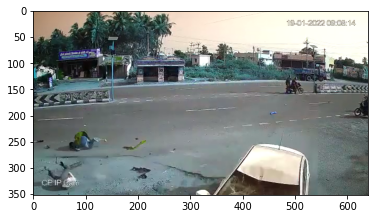

In [15]:
print(plt.imshow(image[7]))

In [43]:
import geocoder
from twilio.rest import Client as client
from geopy.geocoders import Nominatim

In [44]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid =  'AC9471a76c17ed75eb9b88eb209a9d61cd'#Enter Your account sid
auth_token ='b788c013b9aa4f14b5183fb3c7f57307' #Enter your auth token
clientq = client(account_sid, auth_token)

In [1]:
cap = cv2.VideoCapture('videoplayback.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    clientq.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= '+16203776457',
                 to= '+916382906223'
                )      

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()
